# Generating the Painbow Color Gradient from XKCD
> Generating the highly controvertial color map in Python and Matplotlib

- badges: true
- comments: true
- categories: [jupyter]
- hide: false
- image: images/painbow_award.png
- permalink: /painbow/

In [1]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

In [2]:
def make_colormap(seq):
    seq = [(None,) * 3, 0.0] + list(seq) + [1.0, (None,) * 3]
    cdict = {'red': [], 'green': [], 'blue': []}
    for i, item in enumerate(seq):
        if isinstance(item, float):
            r1, g1, b1 = seq[i - 1]
            r2, g2, b2 = seq[i + 1]
            cdict['red'].append([item, r1, r2])
            cdict['green'].append([item, g1, g2])
            cdict['blue'].append([item, b1, b2])
    return mcolors.LinearSegmentedColormap('CustomMap', cdict)


c = mcolors.ColorConverter().to_rgb
painbow = make_colormap(
        [c('#ffffff'), c('#ffffff'), 0.02,  # white to white
         c('#ffffff'), c('#000000'), 0.15,  # white to black
         c('#000000'), c('#5c6889'), 0.25,  # black to gray
         c('#5c6889'), c('#1f7c61'), 0.30,  # gray to green
         c('#1f7c61'), c('#ff0000'), 0.35,  # green to red
         c('#ff0000'), c("#0bc21d"), 0.75,  # red to light green
         c("#0bc21d"), c("#cbf26e"), 0.90,  # light green to yellow
         c('#cbf26e'), c("#e7e9e1"), 1 ,    # yellow to white
         c('#e7e9e1')])                     # white

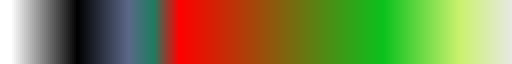

In [3]:
painbow

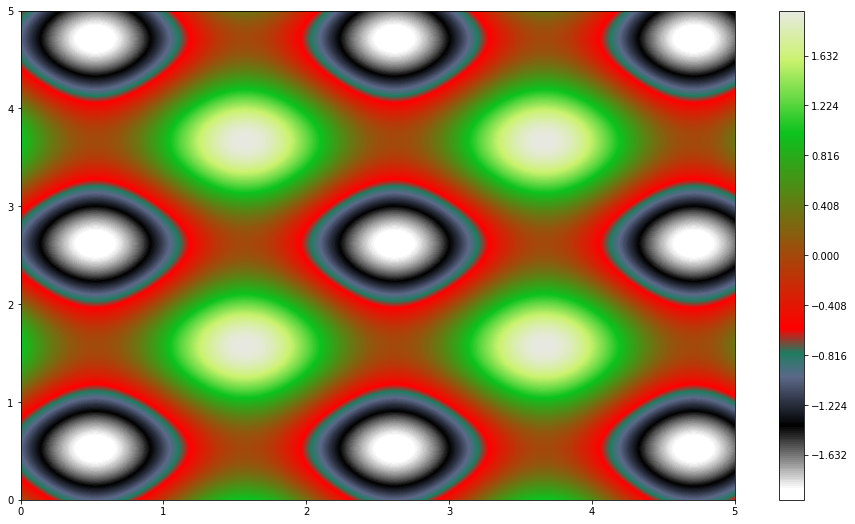

In [9]:
def f(x, y):
    return np.sin(x*3) + np.sin(y*3)

x = np.linspace(0, 5, 1000)
y = np.linspace(0, 5, 1000)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

plt.figure(figsize=(16,9))
plt.contourf(X, Y, -Z, 500, cmap=painbow)
plt.colorbar();